# Annual Gross Domestic Product Analysis per Country from 2020 to 2025

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression

**Import Raw Data**

In [2]:
df = pd.read_csv("gdp_dataset.csv")
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


**Analysing Data Set**

In [3]:
df.shape

(196, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [5]:
print("Missing Values:")
print(df.isnull().sum())
print("\n")

Missing Values:
Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64




In [6]:
df.describe()

,2020,2021,2022,2023,2024,2025
count,1.960000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.920000e+02,1.890000e+02
mean,4.378886e+05,5.043504e+05,5.255064e+05,5.486173e+05,5.756871e+05,5.991414e+05
std,1.942936e+06,2.220864e+06,2.347886e+06,2.453040e+06,2.573189e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,9.588000e+03,1.114175e+04,1.265000e+04,1.360450e+04,1.350050e+04,1.421400e+04
50%,3.533450e+04,3.771900e+04,4.156800e+04,4.363100e+04,4.713550e+04,4.782900e+04
75%,2.074810e+05,2.546132e+05,2.746308e+05,2.850355e+05,2.915108e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


# Business Requirement

In [7]:
# Calculate total Growth
df['Total Growth'] = df['2025'] - df['2020']
# Calculate average annual growth
df['Average Annual Growth'] = (df['2025'] / df['2020']) ** (1/5) - 1 
# Create a list of columns to clean
year_columns = ['2020', '2021', '2022', '2023', '2024', '2025']
# Calculate Volatility (Standard Deviation across the years)
df['Standard Deviation'] = df[year_columns].std(axis=1)
# Categorize by Average GDP Size
avg_gdp = df[year_columns].mean(axis=1)
df['Economy Size'] = pd.qcut(avg_gdp, q=3, labels=['Small', 'Medium', 'Large'])
# Calculate Recent Growth (2023 to 2025)
df['Recent Growth Rate'] = (df['2025'] / df['2023']) ** (1/2) - 1 

In [8]:
df.head()

,Country,2020,2021,2022,2023,2024,2025,Total Growth,Average Annual Growth,Standard Deviation,Economy Size,Recent Growth Rate
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN,NaN,NaN,2751.159922,Small,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0,13101.0,0.131891,5266.439990,Medium,0.101409
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0,104111.0,0.102899,42867.752850,Large,0.041699
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0,1150.0,0.069398,457.970923,Small,0.032361
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0,46822.0,0.112467,26529.571717,Medium,0.016172


# Chart Requirements

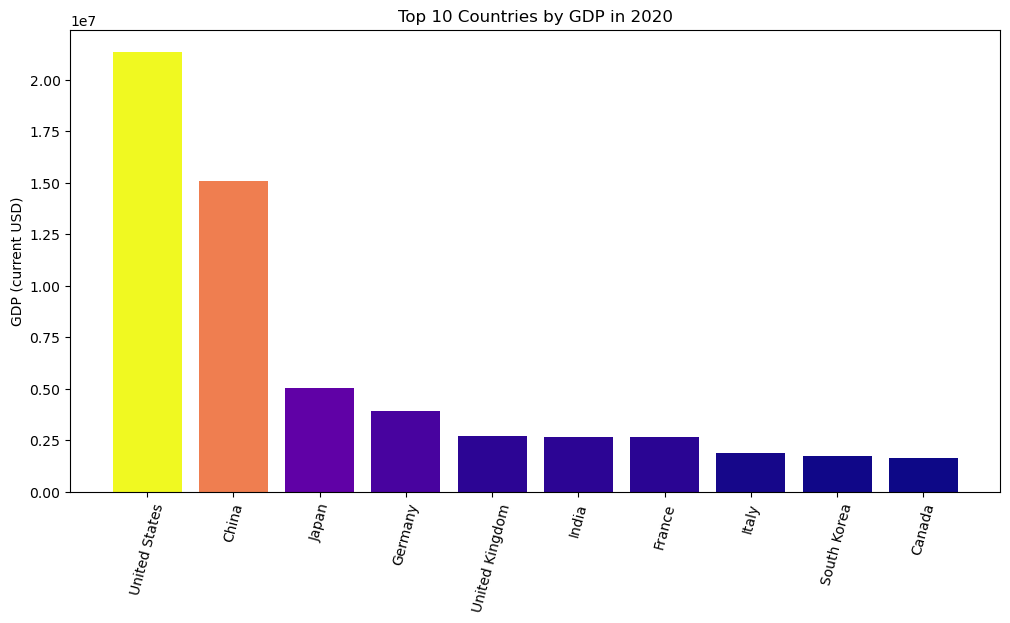

In [9]:
# Top 10 Countries by GDP in 2020
top_10_2020 = df[['Country', '2020']].sort_values(by='2020', ascending=False).head(10)
norm = plt.Normalize(top_10_2020['2020'].min(), top_10_2020['2020'].max())
colors = cm.plasma(norm(top_10_2020['2020']))
plt.figure(figsize=(12,6))
plt.bar(top_10_2020['Country'], top_10_2020['2020'], color=colors)
plt.xticks(rotation=75)
plt.title("Top 10 Countries by GDP in 2020")
plt.ylabel("GDP (current USD)")
plt.show()

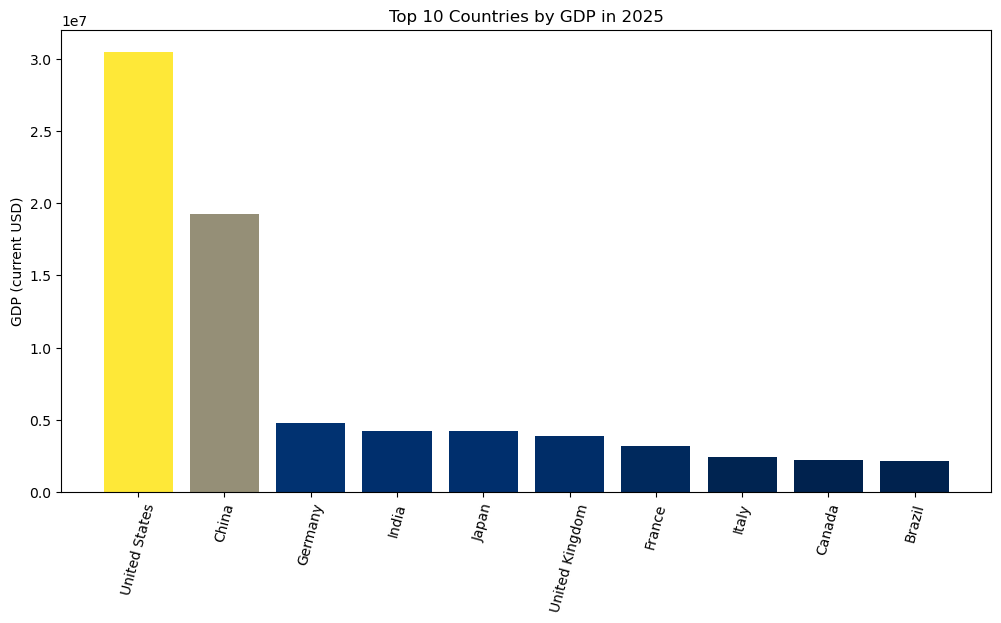

In [10]:
# Top 10 Countries by GDP in 2025
top_10_2025 = df[['Country', '2025']].sort_values(by='2025', ascending=False).head(10)
norm = plt.Normalize(top_10_2025['2025'].min(), top_10_2025['2025'].max())
colors = cm.cividis(norm(top_10_2025['2025']))
plt.figure(figsize=(12,6))
plt.bar(top_10_2025['Country'], top_10_2025['2025'], color=colors)
plt.xticks(rotation=75)
plt.title("Top 10 Countries by GDP in 2025")
plt.ylabel("GDP (current USD)")
plt.show()

**Top 10 Fastest Growing Economies (2020 - 2025)**

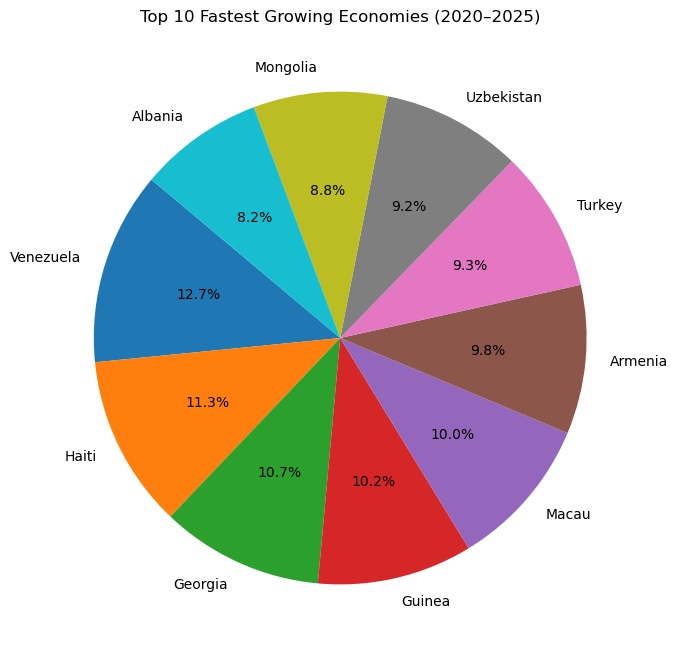

In [11]:
growth_df = df[df['2020'] > 10000]
# Top 10 fastest growing economies by annual growth
top_10_growth = growth_df.nlargest(10, 'Average Annual Growth')[['Country', 'Average Annual Growth']]
plt.figure(figsize=(8,8))
plt.pie(
    top_10_growth['Average Annual Growth'],
    labels=top_10_growth['Country'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Top 10 Fastest Growing Economies (2020–2025)")
plt.show()

**GDP Trend (2020 - 2025) of Nepal**

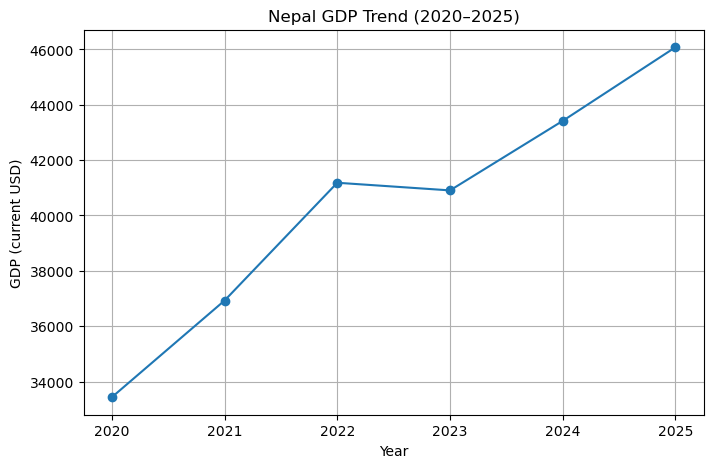

In [12]:
nepal = df[df['Country'] == 'Nepal'].iloc[0]
years = [2020, 2021, 2022, 2023, 2024, 2025]
values = [nepal[str(y)] for y in years]
plt.figure(figsize=(8,5))
plt.plot(years, values, marker='o')
plt.title("Nepal GDP Trend (2020–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (current USD)")
plt.grid(True)
plt.show()

## Forcasting Annual GDP of Nepal of 2026

In [13]:
years = np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
future_years = np.array([2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
#Create new dataframe
predictions = pd.DataFrame({"Country": df['Country']})

In [14]:
for idx, row in df.iterrows():
    y = row[["2020", "2021", "2022", "2023", "2024", "2025"]].values.astype(float)
    
    # Handle missing values by skipping countries with too many NaNs
    if np.isnan(y).sum() > 2:
        preds = [np.nan]*5
    else:
        # Replace NaNs with linear interpolation
        y = pd.Series(y).interpolate().values
        
        model = LinearRegression()
        model.fit(years, y)
        preds = model.predict(future_years)
    
    predictions.loc[idx, ["2026","2027","2028","2029","2030"]] = preds

In [15]:
final_df = pd.concat([df, predictions[["2026","2027","2028","2029","2030"]]], axis=1)

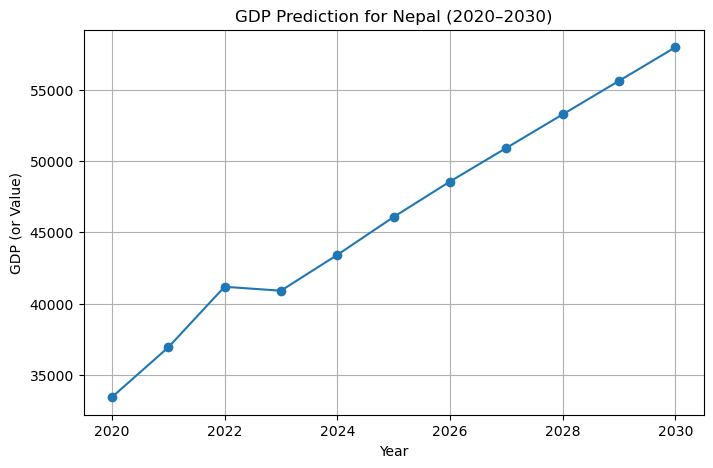

In [16]:
country = "Nepal"
row = final_df[final_df['Country'] == country].iloc[0]
plt.figure(figsize=(8,5))
plt.plot(range(2020,2031), row[["2020","2021","2022","2023","2024","2025","2026","2027","2028","2029","2030"]].values, marker='o')
plt.title(f"GDP Prediction for {country} (2020–2030)")
plt.xlabel("Year")
plt.ylabel("GDP (or Value)")
plt.grid(True)
plt.show()